In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
import glob
import lab2

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_complex(data, nblocs):
    split = np.array(np.split(data, 2*nblocs))
    real =  np.array(np.arange(0, 2*nblocs) >= nblocs, dtype = bool)
    imag = np.invert(real)
    return split[real] + 1j*split[imag]

In [ ]:
np.genfromtxt('1420_990Blocks.txt')

Sampling at a frequency 62.5
Sampling with 2048 number of samples


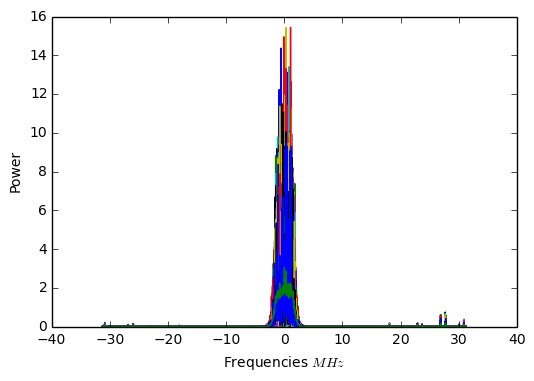

In [3]:
d1420 = 0.1*np.genfromtxt('1420_notest_0.txt')/(2.**15)
d1420_comp = make_complex(d1420, 99)
lab2.plot_power(d1420_comp, 1, 2**11)

Sampling at a frequency 62.5
Sampling with 8192 number of samples


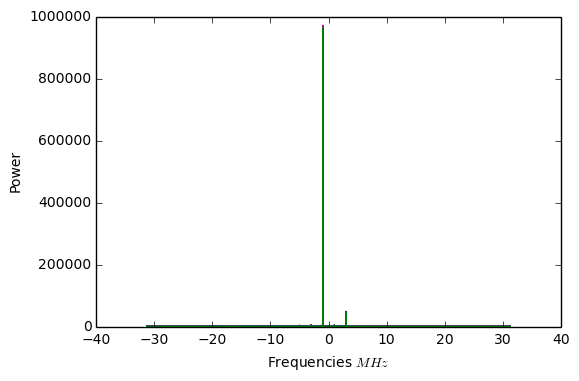

In [4]:
d1419 = 0.1*np.genfromtxt('1419_test_0.txt')/(2.**15)
d1419_comp = make_complex(d1419, 99)
lab2.plot_power(d1419_comp, 1, 2**13)

Sampling at a frequency 62.5
Sampling with 2048 number of samples


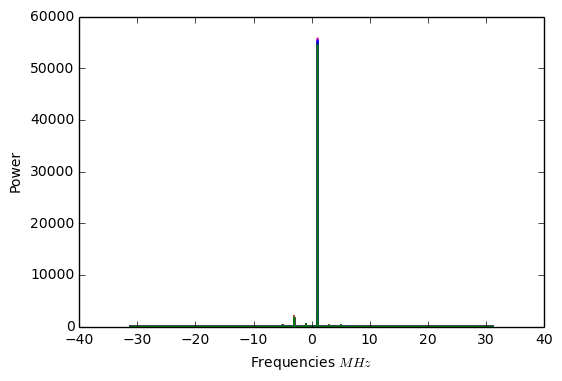

In [5]:
d1421 = 0.1*np.genfromtxt('1421_test_0.txt')/(2.**15)
d1421_comp = make_complex(d1421, 99)
lab2.plot_power(d1421_comp, 1, 2**11)

In [6]:
def power(compData, div, N):
    vsamp = 62.5
    time = np.linspace(-N/2./vsamp, (N/2. - 1)/vsamp, N)
    freq = np.linspace(-vsamp/2, (vsamp/2)*(1-2./N), N)
    fft_ = np.fft.fft(compData[:,:N])
    power = abs(fft_)**2
    return freq, power

In [22]:
2**13

8192

(-0.2, 0.2)

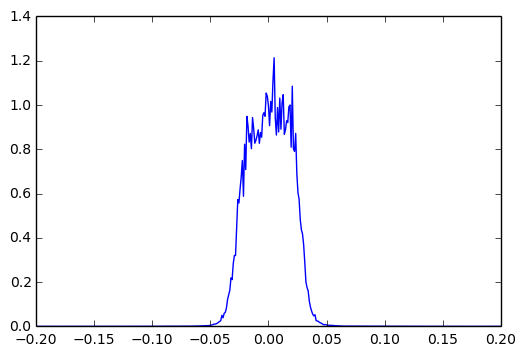

In [24]:
frequency, power_spec = power(d1420_comp , 1, 2**10)
sum_power = 0
for p in power_spec:
    sum_power += p
plt.plot(np.fft.fftshift(np.fft.fftfreq(2**10)), np.fft.fftshift(sum_power)/len(d1420_comp), label = 'average')
plt.xlim(-.2,.2)

(-2, 5)

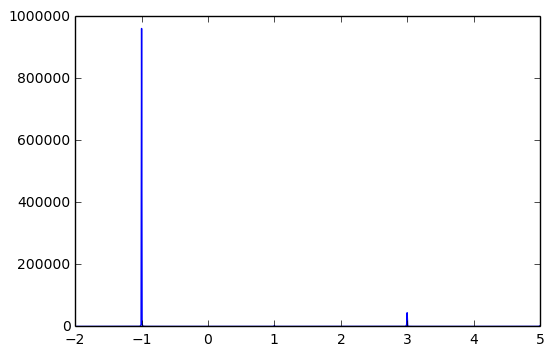

In [8]:
frequency, power_spec = power(d1419_comp , 1, 2**13)
sum_power = 0
for p in power_spec:
    sum_power += p
plt.plot(frequency, np.fft.fftshift(sum_power)/len(d1419_comp), label = 'average')
plt.xlim(-2,5)

(-5, 2)

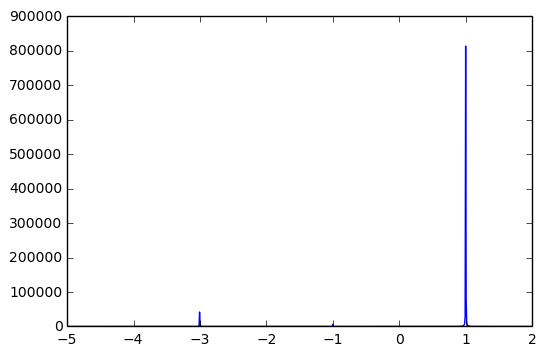

In [9]:
frequency, power_spec = power(d1421_comp , 1, 2**13)
sum_power = 0
for p in power_spec:
    sum_power += p
plt.plot(frequency, np.fft.fftshift(sum_power)/len(d1421_comp), label = 'average')
plt.xlim(-5,2)

In [10]:
def make_complex_3D(data, nblocs, nchunks):
    if len(data[0,:]) % nchunks != 0:
        sys.exit("Cannot split into these number of chunks. Try a divisible of {}".format(len(data[0,:])))
    else:
        new_comp = data.reshape((nblocs, nchunks, N/nchunks))
    return new_comp

In [13]:
nblocks = 99
N = 16000
nchunks = 20


(-0.2, 0.2)

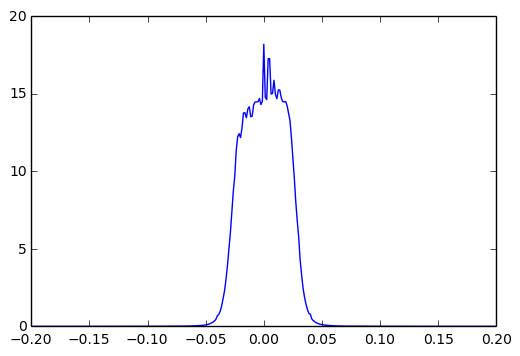

In [16]:
newcomp = make_complex_3D(d1420_comp, nblocks, nchunks)
frequency, newpower = power(newcomp, 1, 2**10)
sum_pr = 0
for i in range(99):
    for j in range(20):
        sum_pr += newpower[i,j,:]
plt.plot(np.fft.fftshift(np.fft.fftfreq(800)), np.fft.fftshift(sum_pr)/len(d1420_comp), label = 'average')
plt.xlim(-.2,.2)

In [ ]:
newcomp = make_complex_3D(d1421_comp, nblocks, nchunks)
frequency, newpower = power(newcomp, 1, 2**10)
sum_pr = 0
for i in range(99):
    for j in range(100):
        sum_pr += newpower[i,j,:]
plt.plot(np.fft.fftshift(np.fft.fftfreq(160)), np.fft.fftshift(sum_pr)/len(d1421_comp), label = 'average')
plt.xlim(-.2,.2)

In [ ]:
newcomp = make_complex_3D(d1419_comp, nblocks, nchunks)
frequency, newpower = power(newcomp, 1, 2**10)
sum_pr = 0
for i in range(99):
    for j in range(100):
        sum_pr += newpower[i,j,:]
plt.plot(np.fft.fftshift(np.fft.fftfreq(160)), np.fft.fftshift(sum_pr)/len(d1419_comp), label = 'average')
plt.xlim(-.2,.2)